In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from scipy.stats import shapiro
from scipy.stats import lognorm
from scipy.stats.stats import pearsonr
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:

path = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\preprocessed_df.csv"
total_df = pd.read_csv(path)

path1 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\descriptive_table.csv"
descript = pd.read_csv(path1)

path2 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\emt12.csv"
emt12_df = pd.read_csv(path2)

path3 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\emt34.csv"
emt34_df = pd.read_csv(path3)

path4 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\emt1.csv"
emt1_df = pd.read_csv(path4)

path5 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\cup12.csv"
cup12_df = pd.read_csv(path5)

path6 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\cup34.csv"
cup34_df = pd.read_csv(path6)

path7 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\cup1.csv"
cup1_df = pd.read_csv(path7)

path8 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\con12.csv"
con12_df = pd.read_csv(path8)

path9 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\con34.csv"
con34_df = pd.read_csv(path9)

path10 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\con1.csv"
con1_df = pd.read_csv(path10)

path11 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\rom142.csv"
rom142_df = pd.read_csv(path11)

path12 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\rom143.csv"
rom143_df = pd.read_csv(path12)

path13 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\rom122.csv"
rom122_df = pd.read_csv(path13)

path14 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\rom123.csv"
rom123_df = pd.read_csv(path14)

path15 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\wir4.csv"
wir4_df = pd.read_csv(path15)

path16 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\wir6.csv"
wir6_df = pd.read_csv(path16)

path17 = "C:\\Users\\kijah\\Documents\\Data_Bootcamp\\Estimator_Project\\PreprocessedDataFrames\\wir10.csv"
wir10_df = pd.read_csv(path17)

<AxesSubplot:ylabel='Frequency'>

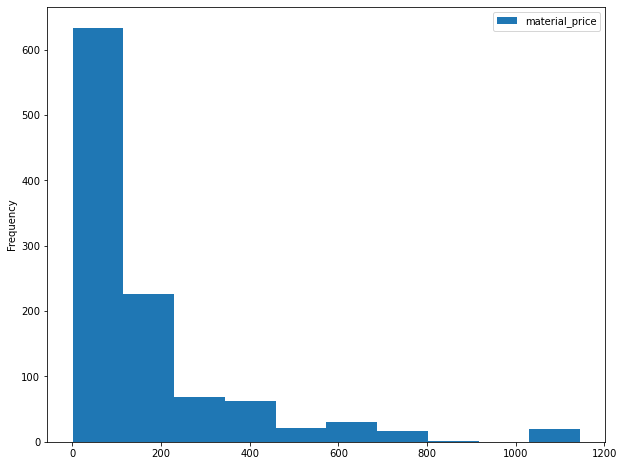

In [3]:
total_df.plot.hist(by=["material_price"], figsize=(10, 8))

In [4]:
# s_result_wir10[1]
s_result_emt12 = shapiro(emt12_df['material_price'])
s_result_emt34 = shapiro(emt34_df['material_price'])
s_result_emt1 = shapiro(emt1_df['material_price'])
s_result_cup12 = shapiro(cup12_df['material_price'])
s_result_cup34 = shapiro(cup34_df['material_price'])
s_result_cup1 = shapiro(cup1_df['material_price'])
s_result_con12 = shapiro(con12_df['material_price'])
s_result_con34 = shapiro(con34_df['material_price'])
s_result_con1 = shapiro(con1_df['material_price'])
s_result_rom142 = shapiro(rom142_df['material_price'])
s_result_rom143 = shapiro(rom143_df['material_price'])
s_result_rom122 = shapiro(rom122_df['material_price'])
s_result_rom123 = shapiro(rom123_df['material_price'])
s_result_wir4 = shapiro(wir4_df['material_price'])
s_result_wir6 = shapiro(wir6_df['material_price'])
s_result_wir10 = shapiro(wir10_df['material_price'])
s_result_total = shapiro(total_df['material_price'])

shapiro_t = []

Shapiro = [s_result_emt12,
s_result_emt34,
s_result_emt1,
s_result_cup12,
s_result_cup34,
s_result_cup1,
s_result_con12,
s_result_con34,
s_result_con1,
s_result_rom142,
s_result_rom143,
s_result_rom122,
s_result_rom123,
s_result_wir4,
s_result_wir6,
s_result_wir10,
s_result_total]

for s in Shapiro:
    results = {'statistic': s[0], 'pvalue': s[1]}
    shapiro_t.append(results)
mat_name = ['emt12',
'emt34',
'emt1',
'cup12',
'cup34',
'cup1',
'con12',
'con34',
'con1',
'rom142',
'rom143',
'rom122',
'rom123',
'wir4',
'wir6',
'wir10',
'total']


shapiro_table = pd.DataFrame(shapiro_t)
shapiro_table['material'] = mat_name
shapiro_table = shapiro_table.iloc[:,[2,0,1]]
shapiro_table

,material,statistic,pvalue
0,emt12,0.431140,3.710523e-18
1,emt34,0.840706,2.201819e-07
2,emt1,0.866072,2.968605e-06
3,cup12,0.897105,5.505244e-05
4,cup34,0.565513,1.786391e-12
5,cup1,0.589189,7.625875e-08
6,con12,0.879512,2.934346e-05
7,con34,0.639654,8.525174e-13
8,con1,0.203320,1.213544e-10
9,rom142,0.727837,1.357408e-12


<AxesSubplot:ylabel='Frequency'>

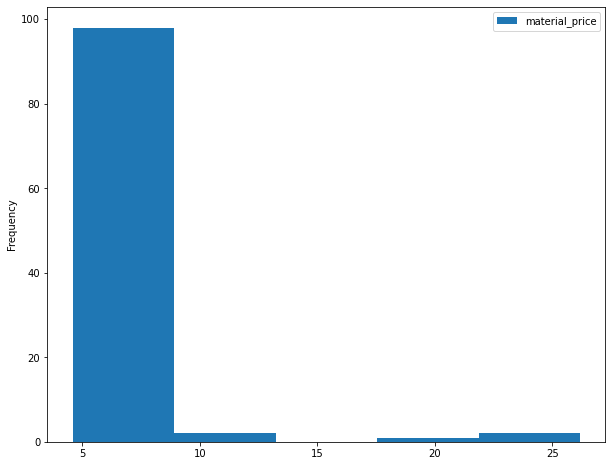

In [5]:
emt12_df.plot.hist(by=["material_price"], bins=5, figsize=(10, 8))

<AxesSubplot:ylabel='Density'>

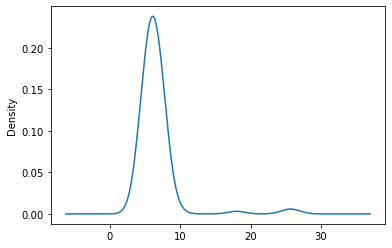

In [6]:
emt12_df["material_price"].plot(kind='kde')

In [7]:
emt12 = emt12_df['material_price']
emt34 = emt34_df['material_price']
emt1 = emt1_df['material_price']
cup12 = cup12_df['material_price']
cup34 = cup34_df['material_price']
cup1 = cup1_df['material_price']
con12 = con12_df['material_price']
con34 = con34_df['material_price']
con1 = con1_df['material_price']
rom142 = rom142_df['material_price']
rom143 = rom143_df['material_price']
rom122 = rom122_df['material_price']
rom123 = rom123_df['material_price']
wir4 = wir4_df['material_price']
wir6 = wir6_df['material_price']
wir10 = wir10_df['material_price']
total = total_df['material_price']

In [8]:

length = [len(emt12_df),
len(emt34_df),
len(emt1_df),
len(cup12_df),
len(cup34_df),
len(cup1_df),
len(con12_df),
len(con34_df),
len(con1_df),
len(rom142_df),
len(rom143_df),
len(rom122_df),
len(rom123_df),
len(wir4_df),
len(wir6_df),
len(wir10_df),
len(total_df)]

shapiro_table['length'] = length
shapiro_table

,material,statistic,pvalue,length
0,emt12,0.431140,3.710523e-18,103
1,emt34,0.840706,2.201819e-07,73
2,emt1,0.866072,2.968605e-06,68
3,cup12,0.897105,5.505244e-05,65
4,cup34,0.565513,1.786391e-12,64
5,cup1,0.589189,7.625875e-08,29
6,con12,0.879512,2.934346e-05,59
7,con34,0.639654,8.525174e-13,81
8,con1,0.203320,1.213544e-10,25
9,rom142,0.727837,1.357408e-12,104


In [9]:
# Correlation between emt and couplings

print([pearsonr(descript['emt12'], descript['cup12']),
pearsonr(descript['emt34'], descript['cup34']),
pearsonr(descript['emt1'], descript['cup1'])])

[(0.9921000404832472, 1.2252870990770216e-06), (0.9772848295358301, 2.8804454131961542e-05), (0.9167446655287064, 0.0013541162289894848)]


In [10]:
# Correlation between emt and connectors

print([pearsonr(descript['emt12'], descript['con12']),
pearsonr(descript['emt34'], descript['con34']),
pearsonr(descript['emt1'], descript['con1'])])

[(0.9913627809784681, 1.6004577858914925e-06), (0.9936749903146844, 6.295947852268653e-07), (0.9190487356045085, 0.0012469908742843018)]


In [11]:
# Correlation between wire

print([pearsonr(descript['wir4'], descript['wir6']),
pearsonr(descript['wir6'], descript['wir10']),
pearsonr(descript['wir10'], descript['wir4'])])

[(0.8061416275244381, 0.01566805312126112), (0.9947761731292303, 3.549794949180362e-07), (0.760792563055454, 0.028373409464337928)]


In [12]:
# Correlation between romex

print([pearsonr(descript['rom142'], descript['rom143']),
pearsonr(descript['rom122'], descript['rom123'])])

[(0.6927687877981248, 0.05682054417977923), (0.9623967568724844, 0.00012920713641987529)]


In [13]:
total_df.head()

,material_description,material_price,vendor,location,formatted_datetime,dow,zip,region,target price
0,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,7.22,homedepot,"2455 Paces Ferry Rd SE. Atlanta, GA, 30339",10/20/2022 20:22,Thursday,30339,southeast,high price
1,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,5.99,lowes,"1000 Lowe's Blvd. Mooresville, NC, 28117",10/20/2022 20:22,Thursday,28117,east,about average
2,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,4.73,gordonelectricsupply,"1290 N Hobbie Ave. Kankakee, Illinois, 60901",10/20/2022 20:22,Thursday,60901,central,low price
3,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,5.88,supplyworks,"6260 Abbott Dr. Omaha, Nebraska, 68110",10/20/2022 20:22,Thursday,68110,central,low price
4,1/2 in. x 10 ft. Electric Metallic Tube (EMT) ...,9.09,ebay,"2025 Hamilton Avenue. San Jose, California, 95125",10/20/2022 20:22,Thursday,95125,west,high price


In [14]:
le = LabelEncoder()
encoded_df = total_df
encoded_df['vendor'] = le.fit_transform(total_df['vendor'])
encoded_df['dow'] = le.fit_transform(total_df['dow'])
encoded_df['region'] = le.fit_transform(total_df['region'])
encoded_df['target price'] = le.fit_transform(total_df['target price'])
encoded_df['material_description'] = le.fit_transform(total_df['material_description'])
encoded_df['formatted_datetime'] = le.fit_transform(total_df['formatted_datetime'])
encoded_df = encoded_df.drop(columns=["location", "zip"])
encoded_df.head()

,material_description,material_price,vendor,formatted_datetime,dow,region,target price
0,5,7.22,12,0,4,7,1
1,5,5.99,16,0,4,1,0
2,5,4.73,11,0,4,0,2
3,5,5.88,25,0,4,0,2
4,5,9.09,9,0,4,8,1


In [15]:
total_df.head()

,material_description,material_price,vendor,location,formatted_datetime,dow,zip,region,target price
0,5,7.22,12,"2455 Paces Ferry Rd SE. Atlanta, GA, 30339",0,4,30339,7,1
1,5,5.99,16,"1000 Lowe's Blvd. Mooresville, NC, 28117",0,4,28117,1,0
2,5,4.73,11,"1290 N Hobbie Ave. Kankakee, Illinois, 60901",0,4,60901,0,2
3,5,5.88,25,"6260 Abbott Dr. Omaha, Nebraska, 68110",0,4,68110,0,2
4,5,9.09,9,"2025 Hamilton Avenue. San Jose, California, 95125",0,4,95125,8,1


In [16]:
encoded_df.corr()

,material_description,material_price,vendor,formatted_datetime,dow,region,target price
material_description,1.000000,0.566561,-0.201215,0.098911,-0.002553,0.135437,-0.224491
material_price,0.566561,1.000000,-0.238152,0.019579,-0.009889,0.230669,-0.148620
vendor,-0.201215,-0.238152,1.000000,-0.035042,0.005507,-0.471186,0.173046
formatted_datetime,0.098911,0.019579,-0.035042,1.000000,0.050421,0.026883,-0.020636
dow,-0.002553,-0.009889,0.005507,0.050421,1.000000,-0.003372,0.003658
region,0.135437,0.230669,-0.471186,0.026883,-0.003372,1.000000,-0.066323
target price,-0.224491,-0.148620,0.173046,-0.020636,0.003658,-0.066323,1.000000


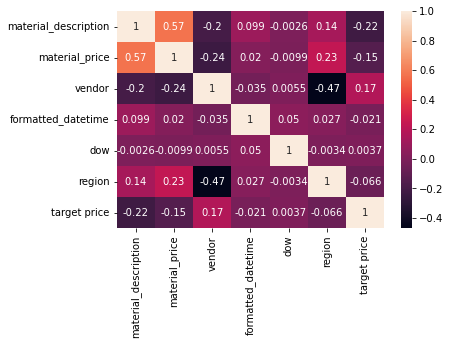

In [17]:
corr_matrix = encoded_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()

In [18]:

encoded_df['target_price'] = encoded_df['target price']
encoded_df.drop(columns =['target price'], inplace = True)
encoded_df = encoded_df[encoded_df.target_price != 0]
encoded_df.head()

,material_description,material_price,vendor,formatted_datetime,dow,region,target_price
0,5,7.22,12,0,4,7,1
2,5,4.73,11,0,4,0,2
3,5,5.88,25,0,4,0,2
4,5,9.09,9,0,4,8,1
5,5,7.22,12,1,0,7,1


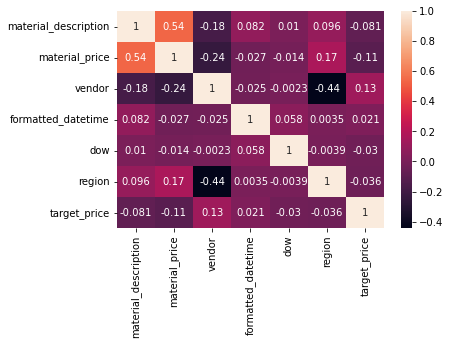

(842, 7)


In [19]:
corr_matrix = encoded_df.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()
print(encoded_df.shape)

In [20]:
# Define the features set.
X = encoded_df.copy()
X = X.drop('target_price', axis=1)
X.head()

,material_description,material_price,vendor,formatted_datetime,dow,region
0,5,7.22,12,0,4,7
2,5,4.73,11,0,4,0
3,5,5.88,25,0,4,0
4,5,9.09,9,0,4,8
5,5,7.22,12,1,0,7


In [21]:
# Define the target set. 1 = 'high price' and 2 = 'low price'

y = encoded_df['target_price'].values
y[:5]

array([1, 2, 2, 1, 1])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(631, 6)
(211, 6)
(631,)
(211,)


In [23]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Creating the decision tree classifier instance.
model = tree.DecisionTreeClassifier()
# Fitting the model.
model = model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = model.predict(X_test_scaled)
predictions

array([2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2])

In [24]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 2", "Actual 1"], columns=["Predicted 2", "Predicted 1"])

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
cm_df

,Predicted 2,Predicted 1
Actual 2,84,4
Actual 1,2,121


In [25]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 2,Predicted 1
Actual 2,84,4
Actual 1,2,121


Accuracy Score : 0.9715639810426541
Classification Report
              precision    recall  f1-score   support

           1       0.98      0.95      0.97        88
           2       0.97      0.98      0.98       123

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211

